In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,BatchNormalization

In [74]:
df =pd.read_csv("train.csv")


In [75]:
df["sat_code"] = df.satisfaction.astype("category").cat.codes
df["gender_code"] = df.Gender.astype("category").cat.codes

In [76]:

df_final = df[['gender_code', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness'
       ,'sat_code']]


df_final

,gender_code,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,sat_code
0,1,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0
1,1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0
2,0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1
3,0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0
4,1,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,2,1,2,3,2,2,2,2,3,1,4,2,3,2,0
103900,1,4,4,4,4,2,4,5,5,5,5,5,5,5,4,1
103901,1,1,1,1,3,4,1,5,4,3,2,4,5,5,4,0
103902,0,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0


In [39]:
df_final.iloc[:,1:]

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,sat_code
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2,0
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4,1
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4,0
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0


In [71]:
df_final['Cleanliness'].unique()

array([5, 1, 2, 3, 4, 0], dtype=int64)

In [77]:
X = df_final.iloc[:,:-1]
y= df["sat_code"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,gender_code,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
20921,0,4,5,4,1,5,4,5,2,2,4,3,5,2,4
36897,0,4,4,4,2,1,4,5,1,4,2,4,3,5,1
8468,1,2,3,2,1,1,2,1,1,5,4,5,5,5,1
53490,0,3,5,3,4,3,5,4,5,5,3,5,3,5,5
78687,0,2,2,2,3,1,2,1,1,1,2,3,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54886,1,3,5,3,5,3,3,3,3,4,3,2,3,2,3
76820,1,3,4,3,1,3,3,2,3,5,1,2,4,4,3
103694,1,1,2,2,2,1,1,1,4,3,3,3,1,1,1
860,0,5,5,5,5,5,5,5,5,1,2,4,1,3,5


In [80]:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))  # Use 'softmax' if you have multiple classes

# Compile the model
model.compile(loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=40, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")




Epoch 1/10
1663/1663 [==============================] - 17s 9ms/step - loss: 0.2561 - accuracy: 0.8907 - val_loss: 0.2003 - val_accuracy: 0.9161
Epoch 2/10
1663/1663 [==============================] - 15s 9ms/step - loss: 0.2031 - accuracy: 0.9153 - val_loss: 0.1951 - val_accuracy: 0.9146
Epoch 3/10
1663/1663 [==============================] - 14s 9ms/step - loss: 0.1887 - accuracy: 0.9204 - val_loss: 0.1658 - val_accuracy: 0.9322
Epoch 4/10
1663/1663 [==============================] - 13s 8ms/step - loss: 0.1818 - accuracy: 0.9231 - val_loss: 0.1775 - val_accuracy: 0.9318
Epoch 5/10
1663/1663 [==============================] - 13s 8ms/step - loss: 0.1786 - accuracy: 0.9240 - val_loss: 0.1622 - val_accuracy: 0.9340
Epoch 6/10
1663/1663 [==============================] - 15s 9ms/step - loss: 0.1726 - accuracy: 0.9273 - val_loss: 0.1586 - val_accuracy: 0.9347
Epoch 7/10
1663/1663 [==============================] - 12s 7ms/step - loss: 0.1689 - accuracy: 0.9292 - val_loss: 0.1439 - val_ac

In [55]:
loss, accuracy = model.evaluate(X, y)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

3247/3247 [==============================] - 13s 4ms/step - loss: 0.1515 - accuracy: 0.9344
Test Loss: 0.1515
Test Accuracy: 93.44%


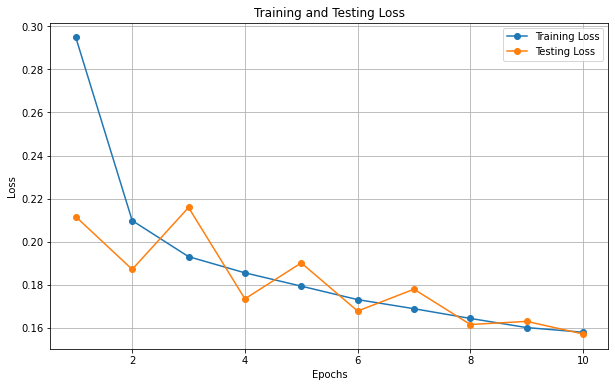

In [43]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create an array of epoch numbers for the x-axis
epochs = range(1, len(train_loss) + 1)

# Plot training and testing loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, test_loss, label='Testing Loss', marker='o')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


